In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')

In [79]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X.shape, y.shape

((100, 2), (100,))

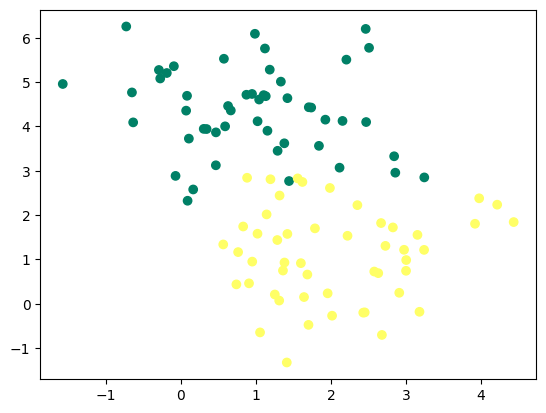

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

In [81]:
X = X.T
y = y.reshape((1, y.shape[0]))
X.shape, y.shape

((2, 100), (1, 100))

In [82]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    parameters = {
     'W1': W1,
     'b1': b1,
     'W2': W2,
     'b2': b2
    }

    return parameters

In [83]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = W1 @ X + b1
    A1 = 1/(1+np.exp(-Z1))
    Z2 = W2 @ A1 + b2
    A2 = 1/(1+np.exp(-Z2))

    activation = {
        'A1': A1,
        'A2': A2
    }
    return activation

In [84]:
def back_propagation(X, y, activation, parameters):
    A1 = activation["A1"]
    A2 = activation["A2"]
    W2 = parameters["W2"]

    dz2 = A2 - y
    dW2 = 1/y.shape[1] * dz2 @ A1.T
    db2 = 1/y.shape[1] * np.sum(dz2, axis=1, keepdims=True)

    dz1 = W2.T @ dz2 * A1 * (1 - A1)
    dW1 = 1/y.shape[1] * dz1 @ X.T
    db1 = 1/y.shape[1] * np.sum(dz1, axis=1, keepdims=True)

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients

In [85]:
def update(gradients, parameters, alpha):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parameters

In [86]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [87]:
def artifical_neuron(X_train, y_train, n1, alpha=0.01, nb_iteration=100):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parameters = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    for _ in range(nb_iteration):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(gradients, parameters, alpha)

        train_loss.append(log_loss(y_train, activations['A2']))
        y_pred = predict(X_train, parameters)
        current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
        train_acc.append(current_accuracy)

    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train_loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train_acc")
    plt.legend()
    plt.show()
    return parameters

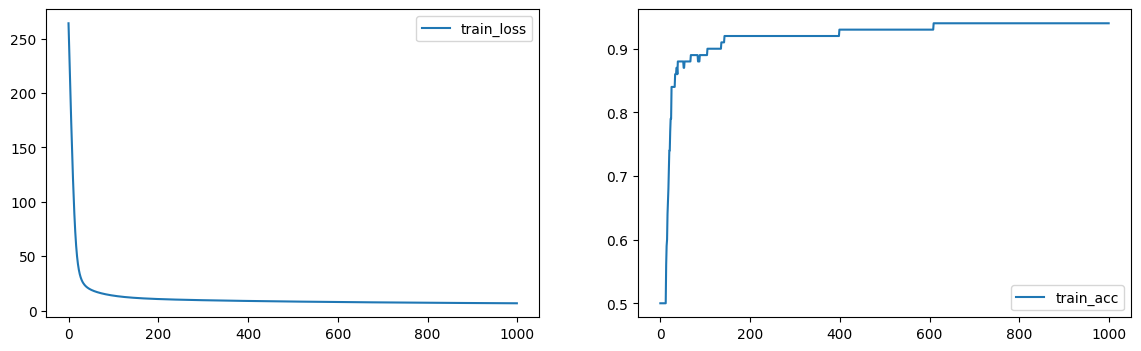

In [90]:
parameters = artifical_neuron(X, y, n1=8, nb_iteration=1000, alpha=0.1)

In [77]:
parameters

{'W1': array([[-0.45759902,  1.04135523],
        [ 0.68151163, -1.39655649]]),
 'b1': array([[-1.46663876],
        [ 2.37194687]]),
 'W2': array([[-2.6970516 ,  4.62110984]]),
 'b2': array([[-0.41261525]])}